<a href="https://colab.research.google.com/github/geovalexis/ml-in-args/blob/master/ml/ML_for_AMR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [6]:
args_df = pd.read_csv("/content/drive/MyDrive/TFM/data/args_data_latest_cleaned.tsv", sep="\t", header=0)
args_df

,sample_name,aac(3)-IId,aac(3)-VIa,aac(6')-Iaa,aadA1,aadA2,aadE-Cc,ant(2'')-Ia,ant(6)-Ia,aph(2'')-Ic,...,dfrB3,ere(A),fosA3,mph(E),msr(E),qnrA1,qnrB2,qnrB77,qnrS2,tet(D)
0,GCA_012637185.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GCA_012637285.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GCA_012637315.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GCA_012637385.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GCA_012637425.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,GCA_008519545.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6187,GCA_008476005.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6188,GCF_001480865.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6189,GCA_007474515.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
snps_df = pd.read_csv("/content/drive/MyDrive/TFM/data/card_snps_data_latest_cleaned.tsv", sep="\t", header=0)
snps_df

,SAMPLE_ID,S357N,D350N,E350Q,E448K,R234F,T86I,D87N,S80I,S83F,T18P,D87Y,D87G,S464Y,G103S,Y137H,S83L,V146F
0,GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
3,GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,GCF_001952475.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5605,GCF_001952565.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5606,GCF_003589785.1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0
5607,GCF_003589805.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
amr_labels_df = pd.read_csv("/content/drive/MyDrive/TFM/data/amr_labels_latest_cleaned.tsv", sep="\t", header=0)
amr_labels_df

,SampleID,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,GCA_007192475.1,1,1,1,1,1,0,0,0,0,0,0,0,0
1,GCA_007191145.1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GCA_007188155.1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GCA_007190575.1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,GCA_007194615.1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,GCA_006500015.1,0,0,0,0,0,0,0,0,0,0,0,1,0
6203,GCA_006497875.1,0,0,0,0,0,0,0,0,0,1,0,1,1
6204,GCA_006497955.1,0,0,0,0,0,0,0,0,0,0,0,1,0
6205,GCA_006815005.1,0,1,0,0,0,1,0,0,0,1,1,1,0


# Preprocess data

For some reason, the sample `GCF_001242765.1` does not have AMR label information:

In [29]:
args_df = args_df[args_df["sample_name"] != "GCF_001242765.1"]

In [30]:
snps_df = snps_df[snps_df["SAMPLE_ID"] != "GCF_001242765.1"]

Add a prefix to all the columns in order to identify the type of data once the data has been merge: "gene/"  and "snp/"

In [31]:
args_df = args_df.set_index("sample_name").add_prefix("gene/").reset_index()

In [32]:
snps_df = snps_df.set_index("SAMPLE_ID").add_prefix("snp/").reset_index()

What type of values are they?

In [33]:
args_df.drop("sample_name", axis=1).apply(pd.value_counts)
# Binary

,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,gene/ant(6)-Ia,gene/aph(2'')-Ic,gene/aph(2'')-If,...,gene/dfrB3,gene/ere(A),gene/fosA3,gene/mph(E),gene/msr(E),gene/qnrA1,gene/qnrB2,gene/qnrB77,gene/qnrS2,gene/tet(D)
0,6084,5795,926,5609,6090,6119,6094,6189,6186,6189,...,6189,6189,6180,6189,6189,6189,6189,6189,6189,6186
1,106,395,5264,581,100,71,96,1,4,1,...,1,1,10,1,1,1,1,1,1,4


In [34]:
snps_df.drop("SAMPLE_ID", axis=1).apply(pd.value_counts)
# Categorical

,snp/ S357N,snp/D350N,snp/E350Q,snp/E448K,snp/R234F,snp/T86I,snp/D87N,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
0,175.0,175.0,227.0,184.0,2681,5438.0,5587.0,5606.0,5590.0,5601.0,5584.0,5600.0,5607.0,5561.0,5561.0,5607.0,5607.0
1,5433.0,5433.0,5381.0,5424.0,556,170.0,21.0,2.0,18.0,7.0,24.0,8.0,1.0,47.0,47.0,1.0,1.0
2,NaN,NaN,NaN,NaN,2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's how much imbalance we have:



In [35]:
amr_labels_df.drop("SampleID", axis=1).apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,5454,4555,5538,5500,5448,6003,6022,5577,5932,4389,4668,2864,6131
1,753,1652,669,707,759,204,185,630,275,1818,1539,3343,76


# Try differente ML approaches

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Approach 1: both ARGs and SNPs

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,5452,4555,5536,5496,5447,5998,6006,5566,5916,4388,4663,2863,6121
1,738,1635,654,694,743,192,184,624,274,1802,1527,3327,69


In [ ]:
X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(0).drop("SAMPLE_ID", axis=1).set_index("sample_name")
X

,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,gene/ant(6)-Ia,gene/aph(2'')-Ic,gene/aph(2'')-If,...,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_012637185.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
GCA_012637285.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
GCA_012637315.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
GCA_012637385.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
GCA_012637425.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_008519545.1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCA_008476005.1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
GCF_001480865.1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8909531502423264


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       1.00      0.93      0.97       166
                   ampicillin       0.98      0.95      0.97       340
                    cefoxitin       0.95      0.97      0.96       151
                    ceftiofur       0.99      0.96      0.97       160
                  ceftriaxone       1.00      0.96      0.98       165
              chloramphenicol       0.95      0.93      0.94        45
                ciprofloxacin       0.97      0.94      0.96        34
                   gentamicin       0.91      0.93      0.92       130
               nalidixic acid       0.98      0.85      0.91        53
                 streptomycin       0.94      0.92      0.93       386
                sulfisoxazole       0.93      0.96      0.94       303
                 tetracycline       0.98      0.99      0.99       664
trimethoprim-sulfamethoxazole       0.78      0.58      0.67        12

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


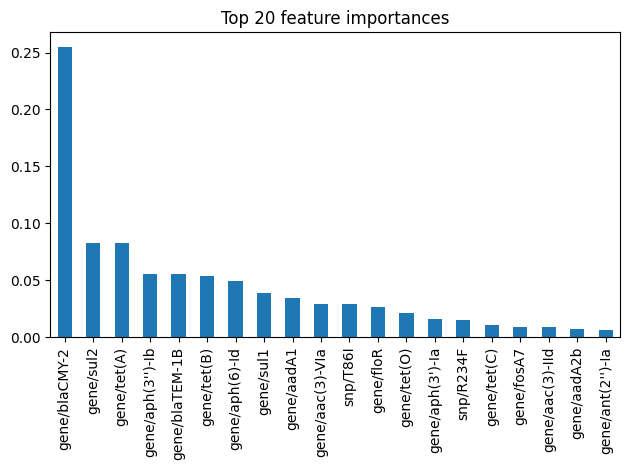

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

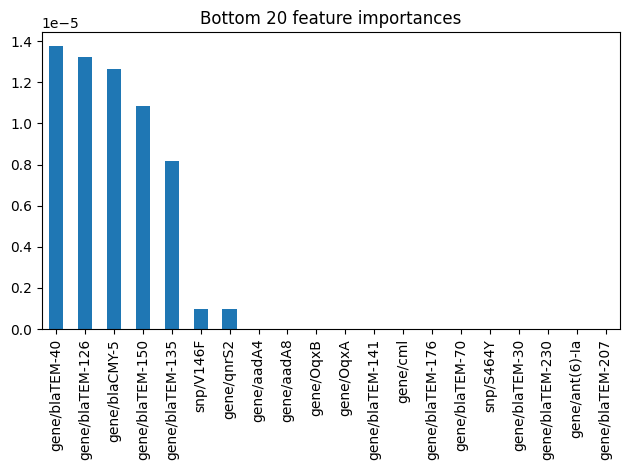

In [ ]:
# Plot bottom 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[-20:]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Bottom 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.13489499192245558

## Approach 2: only ARGs data

In [ ]:
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,5452,4555,5536,5496,5447,5998,6006,5566,5916,4388,4663,2863,6121
1,738,1635,654,694,743,192,184,624,274,1802,1527,3327,69


In [ ]:
X = pd.merge(y.reset_index()[["sample_name"]], args_df, how="left", on="sample_name")
X = X.fillna(-1).set_index("sample_name")
X

,gene/aac(3)-IId,gene/aac(3)-VIa,gene/aac(6')-Iaa,gene/aadA1,gene/aadA2,gene/aadE-Cc,gene/ant(2'')-Ia,gene/ant(6)-Ia,gene/aph(2'')-Ic,gene/aph(2'')-If,...,gene/dfrB3,gene/ere(A),gene/fosA3,gene/mph(E),gene/msr(E),gene/qnrA1,gene/qnrB2,gene/qnrB77,gene/qnrS2,gene/tet(D)
sample_name,,,,,,,,,,,,,,,,,,,,,
GCA_012637185.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637285.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637315.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637385.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_012637425.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_008519545.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_008476005.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCF_001480865.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.845718901453958


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.98      0.92      0.95       133
                   ampicillin       0.99      0.96      0.98       306
                    cefoxitin       0.92      0.96      0.94       114
                    ceftiofur       0.93      0.92      0.92       119
                  ceftriaxone       0.99      0.94      0.97       133
              chloramphenicol       0.97      0.91      0.94        43
                ciprofloxacin       0.54      0.17      0.25        42
                   gentamicin       0.91      0.93      0.92       130
               nalidixic acid       0.65      0.24      0.35        55
                 streptomycin       0.90      0.94      0.92       357
                sulfisoxazole       0.93      0.98      0.95       289
                 tetracycline       0.99      0.98      0.98       650
trimethoprim-sulfamethoxazole       1.00      0.45      0.62        11

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


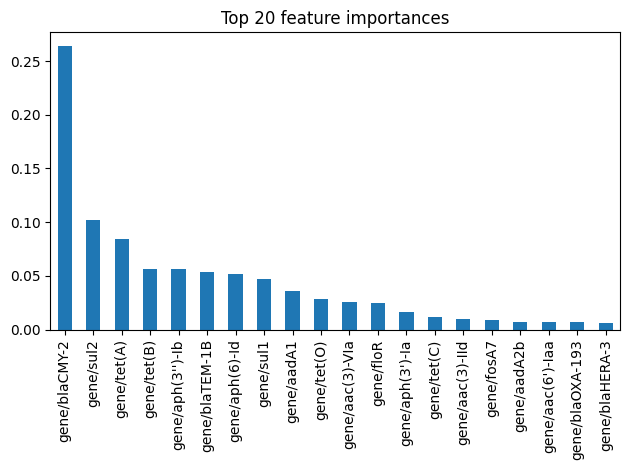

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.14135702746365106

## Approach 3: only SNPs data

In [ ]:
y = pd.merge(snps_df["SAMPLE_ID"], amr_labels_df, left_on="SAMPLE_ID", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("SAMPLE_ID")
y = y.dropna()
y.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,4855,3956,4939,4901,4849,5404,5428,4981,5341,3791,4070,2656,5532
1,753,1652,669,707,759,204,180,627,267,1817,1538,2952,76


In [ ]:
X = pd.merge(y.reset_index()[["SAMPLE_ID"]], snps_df, how="left", on="SAMPLE_ID") # We do this in order to avoid null antibiotics labels
X = X.fillna(-1).set_index("SAMPLE_ID")
X

,snp/ S357N,snp/D350N,snp/E350Q,snp/E448K,snp/R234F,snp/T86I,snp/D87N,snp/S80I,snp/S83F,snp/T18P,snp/D87Y,snp/D87G,snp/S464Y,snp/ G103S,snp/Y137H,snp/S83L,snp/V146F
SAMPLE_ID,,,,,,,,,,,,,,,,,
GCA_003869435.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870275.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003870555.1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003872315.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCA_003872455.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001952475.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_001952565.1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GCF_003589785.1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.27450980392156865


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.00      0.00      0.00       145
                   ampicillin       0.71      0.02      0.03       315
                    cefoxitin       0.00      0.00      0.00       131
                    ceftiofur       0.00      0.00      0.00       132
                  ceftriaxone       0.83      0.03      0.07       147
              chloramphenicol       1.00      0.17      0.29        29
                ciprofloxacin       1.00      0.95      0.97        37
                   gentamicin       0.00      0.00      0.00       135
               nalidixic acid       0.98      0.81      0.89        54
                 streptomycin       0.00      0.00      0.00       367
                sulfisoxazole       1.00      0.02      0.03       309
                 tetracycline       0.60      0.63      0.61       588
trimethoprim-sulfamethoxazole       1.00      0.31      0.48        16

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


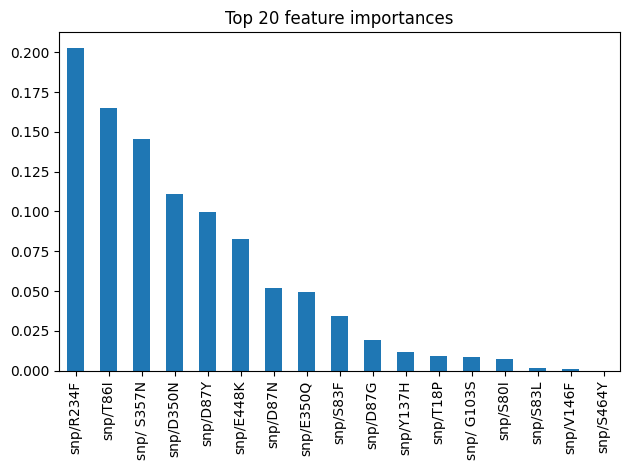

In [ ]:
# Plot top 20 features importances
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Top 20 feature importances")
fig.tight_layout()

In [ ]:
# SANITY CHECK
# This cell is meant to be run optionally between each approach.
# This code will check whether we have a very imbalance dataset or maybe some intrusion within the input data:
# Use the following snippet to check that out. It should give a low accuracy.

accuracy_score(y_test, DummyClassifier().fit(X_train, y_train).predict(X_test))

0.09358288770053476

## Conclusion

After trying different approaches, we have noticed that the best performing data correspond to mix between ARGs and SNPs. Although SNPs data is not really providing too much information, it indeed increases the overall accuracy when train with ARGs data

# Model hyperparameter tunning

In [9]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [10]:
# Prepare data
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()

X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(0).drop("SAMPLE_ID", axis=1).set_index("sample_name")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
y_train.apply(pd.value_counts)

,amoxicillin-clavulanic acid,ampicillin,cefoxitin,ceftiofur,ceftriaxone,chloramphenicol,ciprofloxacin,gentamicin,nalidixic acid,streptomycin,sulfisoxazole,tetracycline,trimethoprim-sulfamethoxazole
0,4357,3642,4427,4399,4359,4799,4806,4450,4733,3523,3727,2299,4891
1,595,1310,525,553,593,153,146,502,219,1429,1225,2653,61


## Random Forest


We have already tried this model with default parameters but Random Forest has multiple hyperparameters to tune. First of all, we are going to choose some values for each parameter.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [ ]:
rf = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=110, max_features='auto',
                       min_samples_split=10, n_estimators=600)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8925686591276252


In [ ]:
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.98      0.97      0.97       147
                   ampicillin       0.98      0.96      0.97       337
                    cefoxitin       0.92      0.98      0.95       135
                    ceftiofur       0.97      0.97      0.97       142
                  ceftriaxone       0.99      0.97      0.98       148
              chloramphenicol       1.00      0.86      0.93        44
                ciprofloxacin       0.97      0.88      0.92        40
                   gentamicin       0.92      0.90      0.91       128
               nalidixic acid       0.95      0.82      0.88        50
                 streptomycin       0.92      0.93      0.93       351
                sulfisoxazole       0.94      0.96      0.95       290
                 tetracycline       0.99      0.98      0.99       655
trimethoprim-sulfamethoxazole       1.00      0.62      0.76        13

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import xgboost as xgb


## CNN (DISCONTINUED)

In [ ]:
# Most simple Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier().fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test)

clf.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8808988764044944

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize all columns using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(3558, 178)

In [ ]:
# Reshape the input data so we can feed it into a CNN
X_train_reshaped = tf.reshape(X_train_scaled, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = tf.reshape(X_test_scaled, (X_test.shape[0], X_test.shape[1], 1))
X_train_reshaped.shape

TensorShape([3558, 178, 1])

### For only one antibiotic (works well)

In [ ]:
# Normal DNN (Deep Neural Network)
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                11456     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 15,746
Trainable params: 15,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CNN
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_reshaped.shape[1:]),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 176, 8)            32        
                                                                 
 batch_normalization (BatchN  (None, 176, 8)           32        
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 174, 8)            200       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 87, 8)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 696)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
# Compile
cnn_model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
history = cnn_model.fit(X_train_reshaped, y_train[["ampicillin"]], epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test[["ampicillin"]]))

Epoch 1/50
112/112 [==============================] - 4s 15ms/step - loss: 0.1801 - accuracy: 0.9413 - val_loss: 0.5157 - val_accuracy: 0.9820
Epoch 2/50
112/112 [==============================] - 2s 16ms/step - loss: 0.0986 - accuracy: 0.9826 - val_loss: 0.3565 - val_accuracy: 0.9865
Epoch 3/50
112/112 [==============================] - 2s 16ms/step - loss: 0.0872 - accuracy: 0.9829 - val_loss: 0.1988 - val_accuracy: 0.9865
Epoch 4/50
112/112 [==============================] - 1s 11ms/step - loss: 0.0898 - accuracy: 0.9837 - val_loss: 0.1189 - val_accuracy: 0.9854
Epoch 5/50
112/112 [==============================] - 1s 11ms/step - loss: 0.0869 - accuracy: 0.9829 - val_loss: 0.0959 - val_accuracy: 0.9854
Epoch 6/50
112/112 [==============================] - 2s 16ms/step - loss: 0.0810 - accuracy: 0.9843 - val_loss: 0.0740 - val_accuracy: 0.9865
Epoch 7/50
112/112 [==============================] - 2s 18ms/step - loss: 0.0791 - accuracy: 0.9845 - val_loss: 0.0780 - val_accuracy: 0.9843

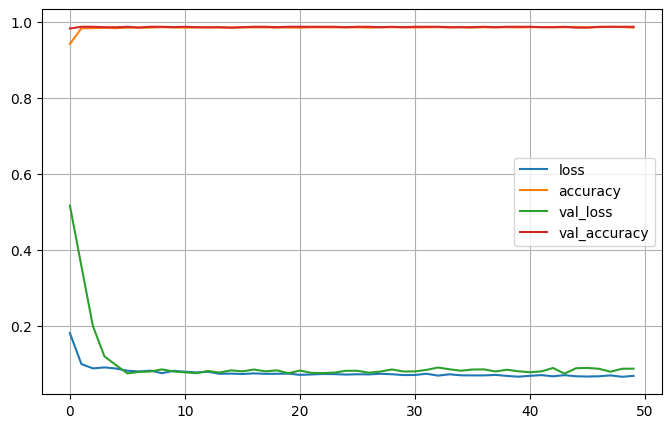

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
cnn_model.evaluate(X_test_reshaped, y_test[["ampicillin"]])

28/28 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9865


[0.0864415168762207, 0.9865168333053589]

### For multiple antibiotics (very low performance)

In [ ]:
# CNN
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_reshaped.shape[1:]),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(8, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

# Print the model summary
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 176, 8)            32        
                                                                 
 batch_normalization_3 (Batc  (None, 176, 8)           32        
 hNormalization)                                                 
                                                                 
 conv1d_7 (Conv1D)           (None, 174, 8)            200       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 87, 8)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 696)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
# Compile
cnn_model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
112/112 [==============================] - 6s 21ms/step - loss: 0.0501 - accuracy: 0.2397 - val_loss: 0.0682 - val_accuracy: 0.2528
Epoch 2/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0495 - accuracy: 0.2403 - val_loss: 0.0685 - val_accuracy: 0.2573
Epoch 3/50
112/112 [==============================] - 1s 12ms/step - loss: 0.0494 - accuracy: 0.2485 - val_loss: 0.0679 - val_accuracy: 0.2562
Epoch 4/50
112/112 [==============================] - 2s 21ms/step - loss: 0.0491 - accuracy: 0.2386 - val_loss: 0.0676 - val_accuracy: 0.2528
Epoch 5/50
112/112 [==============================] - 3s 25ms/step - loss: 0.0503 - accuracy: 0.2397 - val_loss: 0.0677 - val_accuracy: 0.2483
Epoch 6/50
112/112 [==============================] - 2s 21ms/step - loss: 0.0480 - accuracy: 0.2395 - val_loss: 0.0677 - val_accuracy: 0.2483
Epoch 7/50
112/112 [==============================] - 2s 17ms/step - loss: 0.0493 - accuracy: 0.2263 - val_loss: 0.0675 - val_accuracy: 0.2427

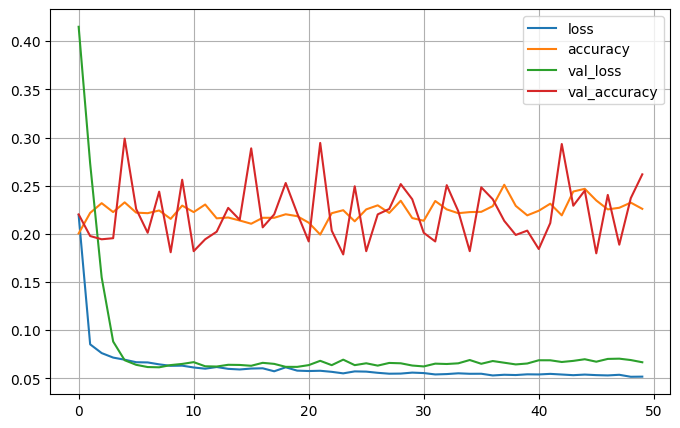

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

# Model evaluation

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [102]:
# Prepare data
y = pd.merge(args_df["sample_name"], amr_labels_df, left_on="sample_name", right_on="SampleID")
y = y.drop("SampleID", axis=1).set_index("sample_name")
y = y.dropna()

X = pd.merge(args_df, snps_df, how="left", left_on="sample_name", right_on="SAMPLE_ID")
X = pd.merge(y.reset_index()[["sample_name"]], X, how="left", on="sample_name")
X = X.fillna(0).drop("SAMPLE_ID", axis=1).set_index("sample_name")

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=914)

## Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### K-fold CrossValidation

In [110]:
# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})


cross_validation_results = cross_validate(rf, X, y, cv=5, scoring=("accuracy", "f1_macro", "roc_auc"), n_jobs=-1, return_train_score=True, return_estimator=True)
pd.DataFrame(cross_validation_results).drop("estimator", axis=1).mean()

fit_time          17.817786
score_time         3.148580
test_accuracy      0.792084
train_accuracy     0.914903
test_f1_macro      0.825354
train_f1_macro     0.960009
test_roc_auc       0.957374
train_roc_auc      0.995082
dtype: float64

In [111]:
pd.DataFrame(cross_validation_results)

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc
0,20.765634,2.653011,"(DecisionTreeClassifier(max_depth=110, max_fea...",0.487076,0.905089,0.730606,0.933005,0.898661,0.993918
1,21.057294,2.887542,"(DecisionTreeClassifier(max_depth=110, max_fea...",0.882876,0.913166,0.838203,0.965240,0.983705,0.995015
2,17.399088,4.446677,"(DecisionTreeClassifier(max_depth=110, max_fea...",0.865105,0.918417,0.851034,0.967400,NaN,0.995460
3,18.770423,3.479794,"(DecisionTreeClassifier(max_depth=110, max_fea...",0.852181,0.920436,0.877691,0.967551,0.971542,0.995760
4,11.096491,2.275878,"(DecisionTreeClassifier(max_depth=110, max_fea...",0.873183,0.917407,0.829237,0.966847,0.975586,0.995258


In [112]:
# Calculate standard deviations
pd.DataFrame(cross_validation_results).drop("estimator", axis=1).agg(["mean", "std"])

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc
mean,17.817786,3.148580,0.792084,0.914903,0.825354,0.960009,0.957374,0.995082
std,4.044838,0.847068,0.170875,0.006094,0.056027,0.015123,0.039467,0.000706


In [113]:
cv_probabilities_scores = [rf.predict_proba(X_test) for rf in cross_validation_results["estimator"]]


In [114]:
pd.DataFrame(cv_probabilities_scores)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"[[1.0, 0.0], [1.0, 0.0], [0.020945767195767177...","[[0.0, 1.0], [0.05882352941176484, 0.941176470...","[[1.0, 0.0], [1.0, 0.0], [0.028875661375661336...","[[1.0, 0.0], [1.0, 0.0], [0.08083002645502685,...","[[1.0, 0.0], [1.0, 0.0], [0.020760582010581993...","[[1.0, 0.0], [1.0, 0.0], [0.035677910052909996...","[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...","[[1.0, 0.0], [1.0, 0.0], [0.019540343915343903...","[[1.0, 0.0], [1.0, 0.0], [0.9998148148148148, ...","[[1.0, 0.0], [0.0882352941176466, 0.9117647058...","[[1.0, 0.0], [1.0, 0.0], [0.006673280423280423...","[[0.0, 1.0], [0.05882352941176484, 0.941176470...","[[1.0, 0.0], [1.0, 0.0], [0.9856514550264553, ..."
1,"[[1.0, 0.0], [1.0, 0.0], [0.056412037037037004...","[[0.0, 1.0], [0.03846153846153888, 0.961538461...","[[1.0, 0.0], [1.0, 0.0], [0.0569907407407407, ...","[[1.0, 0.0], [1.0, 0.0], [0.0965509259259261, ...","[[1.0, 0.0], [1.0, 0.0], [0.055049603174603126...","[[1.0, 0.0], [1.0, 0.0], [0.06821759259259265,...","[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...","[[1.0, 0.0], [0.9615384615384552, 0.0384615384...","[[1.0, 0.0], [1.0, 0.0], [0.9986574074074074, ...","[[1.0, 0.0], [0.03846153846153888, 0.961538461...","[[1.0, 0.0], [0.9615384615384552, 0.0384615384...","[[0.0, 1.0], [0.0, 1.0], [0.003125, 0.99687500...","[[1.0, 0.0], [1.0, 0.0], [0.9708928571428574, ..."
2,"[[1.0, 0.0], [1.0, 0.0], [0.03304894179894177,...","[[0.0, 1.0], [0.07142857142857141, 0.928571428...","[[1.0, 0.0], [1.0, 0.0], [0.04548280423280417,...","[[1.0, 0.0], [1.0, 0.0], [0.10188492063492097,...","[[1.0, 0.0], [1.0, 0.0], [0.032440476190476165...","[[1.0, 0.0], [1.0, 0.0], [0.06088624338624336,...","[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...","[[1.0, 0.0], [0.9642857142857135, 0.0357142857...","[[1.0, 0.0], [1.0, 0.0], [0.9975462962962964, ...","[[1.0, 0.0], [0.1071428571428558, 0.8928571428...","[[1.0, 0.0], [0.9642857142857135, 0.0357142857...","[[0.0, 1.0], [0.07142857142857141, 0.928571428...","[[1.0, 0.0], [1.0, 0.0], [0.9801785714285726, ..."
3,"[[1.0, 0.0], [1.0, 0.0], [0.03844246031746028,...","[[0.0, 1.0], [0.04166666666666694, 0.958333333...","[[1.0, 0.0], [1.0, 0.0], [0.048921957671957624...","[[1.0, 0.0], [1.0, 0.0], [0.10596560846560885,...","[[1.0, 0.0], [1.0, 0.0], [0.038574735449735414...","[[1.0, 0.0], [1.0, 0.0], [0.05426256613756607,...","[[1.0, 0.0], [1.0, 0.0], [0.9998148148148148, ...","[[1.0, 0.0], [0.9583333333333307, 0.0416666666...","[[1.0, 0.0], [1.0, 0.0], [0.998366402116402, 0...","[[1.0, 0.0], [0.08333333333333388, 0.916666666...","[[1.0, 0.0], [0.9583333333333307, 0.0416666666...","[[0.0, 1.0], [0.08333333333333388, 0.916666666...","[[1.0, 0.0], [1.0, 0.0], [0.9838955026455032, ..."
4,"[[1.0, 0.0], [1.0, 0.0], [0.12383068783068799,...","[[0.0, 1.0], [0.07142857142857141, 0.928571428...","[[1.0, 0.0], [1.0, 0.0], [0.14297089947089964,...","[[1.0, 0.0], [1.0, 0.0], [0.1812235449735454, ...","[[1.0, 0.0], [1.0, 0.0], [0.12337500000000012,...","[[1.0, 0.0], [1.0, 0.0], [0.17581216931216945,...","[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...","[[1.0, 0.0], [0.9642857142857135, 0.0357142857...","[[1.0, 0.0], [1.0, 0.0], [0.992156084656085, 0...","[[1.0, 0.0], [0.1071428571428558, 0.8928571428...","[[1.0, 0.0], [0.9642857142857135, 0.0357142857...","[[0.0, 1.0], [0.07142857142857141, 0.928571428...","[[1.0, 0.0], [1.0, 0.0], [0.9367711640211651, ..."


In [115]:
#TODO: Add standard deviation to this report
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.99      0.94      0.96       156
                   ampicillin       0.98      0.97      0.97       347
                    cefoxitin       0.91      0.97      0.94       137
                    ceftiofur       0.97      0.97      0.97       148
                  ceftriaxone       0.99      0.96      0.97       156
              chloramphenicol       1.00      0.97      0.99        37
                ciprofloxacin       1.00      0.98      0.99        44
                   gentamicin       0.92      0.92      0.92       110
               nalidixic acid       0.98      0.93      0.95        55
                 streptomycin       0.92      0.94      0.93       351
                sulfisoxazole       0.94      0.97      0.95       289
                 tetracycline       0.98      0.98      0.98       676
trimethoprim-sulfamethoxazole       1.00      1.00      1.00        12

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation metrics for each antibiotic (ROC plot + table)

In [116]:
from sklearn.metrics import RocCurveDisplay

In [117]:
# Fit and predict model
rf = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})

rf.fit(X_train, y_train)

# Make predictions on the test set
y_scores = rf.predict_proba(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


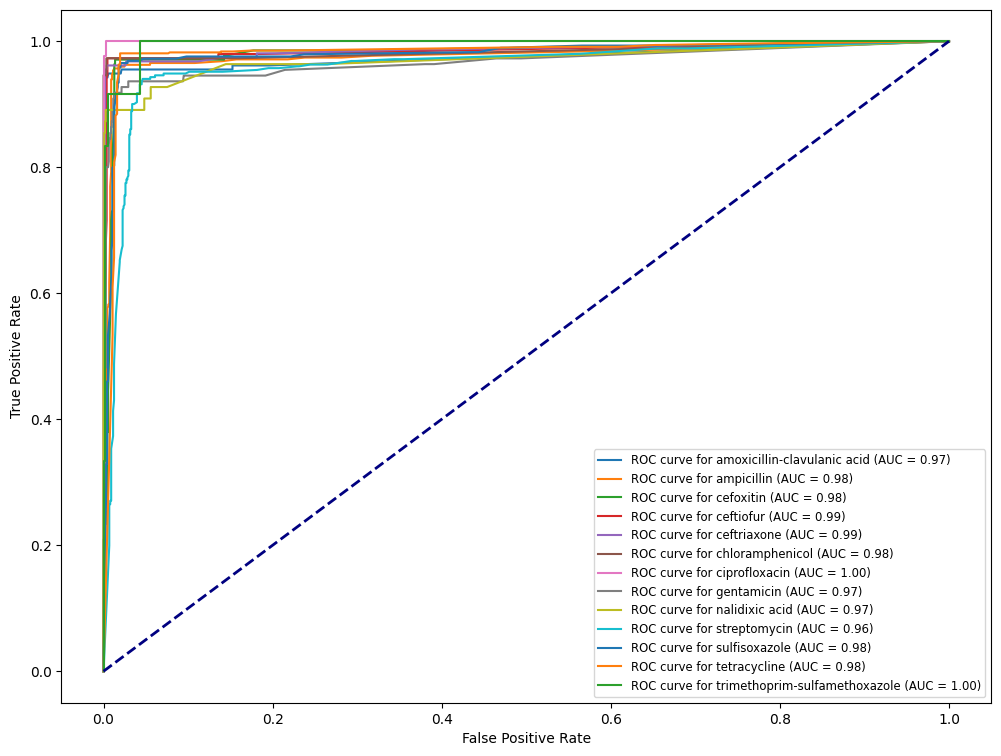

In [118]:
#TODO: add standard deviaton to analysis

fig, ax = plt.subplots(figsize=(12,9))

for class_id, class_name in enumerate(y_test.columns):
    RocCurveDisplay.from_predictions(
        y_test.iloc[:, class_id],
        y_scores[class_id][:,1],
        name=f"ROC curve for {class_name}",
        ax=ax,
    )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize="small")
plt.show()

In [119]:
#TODO: rerun these results of CV5 and add std to these results
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=y.columns))

                               precision    recall  f1-score   support

  amoxicillin-clavulanic acid       0.98      0.94      0.96       156
                   ampicillin       0.97      0.95      0.96       347
                    cefoxitin       0.89      0.97      0.93       137
                    ceftiofur       0.97      0.95      0.96       148
                  ceftriaxone       0.98      0.96      0.97       156
              chloramphenicol       1.00      0.95      0.97        37
                ciprofloxacin       1.00      0.95      0.98        44
                   gentamicin       0.91      0.85      0.88       110
               nalidixic acid       0.98      0.84      0.90        55
                 streptomycin       0.90      0.92      0.91       351
                sulfisoxazole       0.94      0.97      0.95       289
                 tetracycline       0.98      0.98      0.98       676
trimethoprim-sulfamethoxazole       0.75      0.25      0.38        12

    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Top Feature importances


In [120]:
# Fit and predict model
rf = RandomForestClassifier(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False})

rf.fit(X, y) # In this we don't want to test out the predictions, so we use the entire dataset

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=110, max_features='auto',
                       min_samples_split=10, n_estimators=600)

In [121]:
forest_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, 
                          columns=["Importance"])
forest_importances["Std"] = np.std([tree.feature_importances_
                            for tree in rf.estimators_], axis=0)
forest_importances.sort_values("Importance", ascending=False)

,Importance,Std
gene/blaCMY-2,2.703613e-01,0.053931
gene/sul2,9.239534e-02,0.063997
gene/tet(A),7.620239e-02,0.051018
gene/aph(3'')-Ib,5.921308e-02,0.041829
gene/tet(B),5.448648e-02,0.012750
...,...,...
gene/blaTEM-150,8.008425e-06,0.000025
gene/blaOXA-447,6.004517e-06,0.000010
gene/blaCMY-5,3.188198e-06,0.000017
snp/V146F,8.407239e-07,0.000002


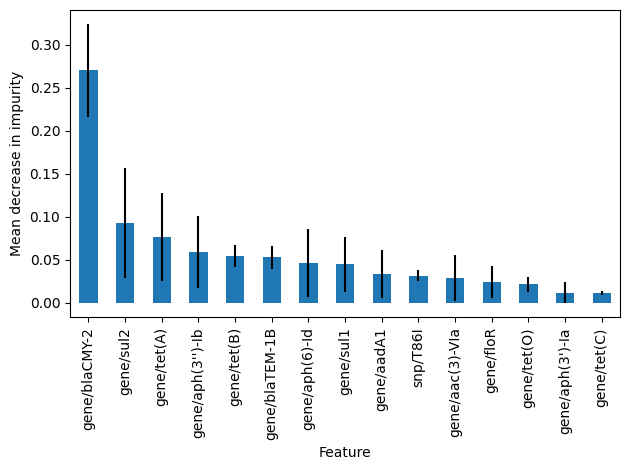

In [122]:
# Plot top 15 features importances
top_n = 15
top_importances = forest_importances.sort_values("Importance", ascending=False).iloc[:top_n,:]

fig, ax = plt.subplots()
top_importances["Importance"].plot.bar(ax=ax, yerr=top_importances["Std"])
#top_importances["Importance"].plot.bar(yerr=std, ax=ax)
#ax.set_title(f"Top {top_n} feature importances")
ax.set_xlabel("Feature")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## CNN (DISCONTINUED)

In [ ]:
#TODO